In [ ]:
import pandas as pd
#Reading the CSV file
df = pd.read_csv('data.csv')
#Display basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [3]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [6]:
for col in['Duration','Pulse','Maxpulse','Calories']:
    df[col].fillna(df[col].mean(),inplace=True)

C:\Users\HILDAH\AppData\Local\Temp\ipykernel_10548\3618439764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [10]:
df.head(30)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.100000
1,60,117,145,479.000000
2,60,103,135,340.000000
3,45,109,175,282.400000
4,45,117,148,406.000000
5,60,102,127,300.000000
6,60,110,136,374.000000
7,45,104,134,253.300000
8,30,109,133,195.100000
9,60,98,124,269.000000


In [7]:
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if df[col].isnull().any():
        print(f"Column '{col}' has missing values.")
    else:
        print(f"Column '{col}' has no missing values.")

Column 'Duration' has no missing values.
Column 'Pulse' has no missing values.
Column 'Maxpulse' has no missing values.
Column 'Calories' has no missing values.


In [8]:
df.shape

(169, 4)

In [9]:
print("Summary statistics:")
print(df.describe())


Summary statistics:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   169.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   262.385991
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   253.300000
50%     60.000000  105.000000  131.000000   321.000000
75%     60.000000  111.000000  141.000000   384.000000
max    300.000000  159.000000  184.000000  1860.400000


In [5]:
duplicates = df.duplicated()
if duplicates.any():
    print(df[duplicates])
else:
    print("No duplicate rows found.")

     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
print(np.__version__)

1.26.4


In [3]:
import matplotlib as plt
print(plt.__version__)


3.9.2


In [11]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Calories Distribution'}, xlabel='Calories', ylabel='Count'>

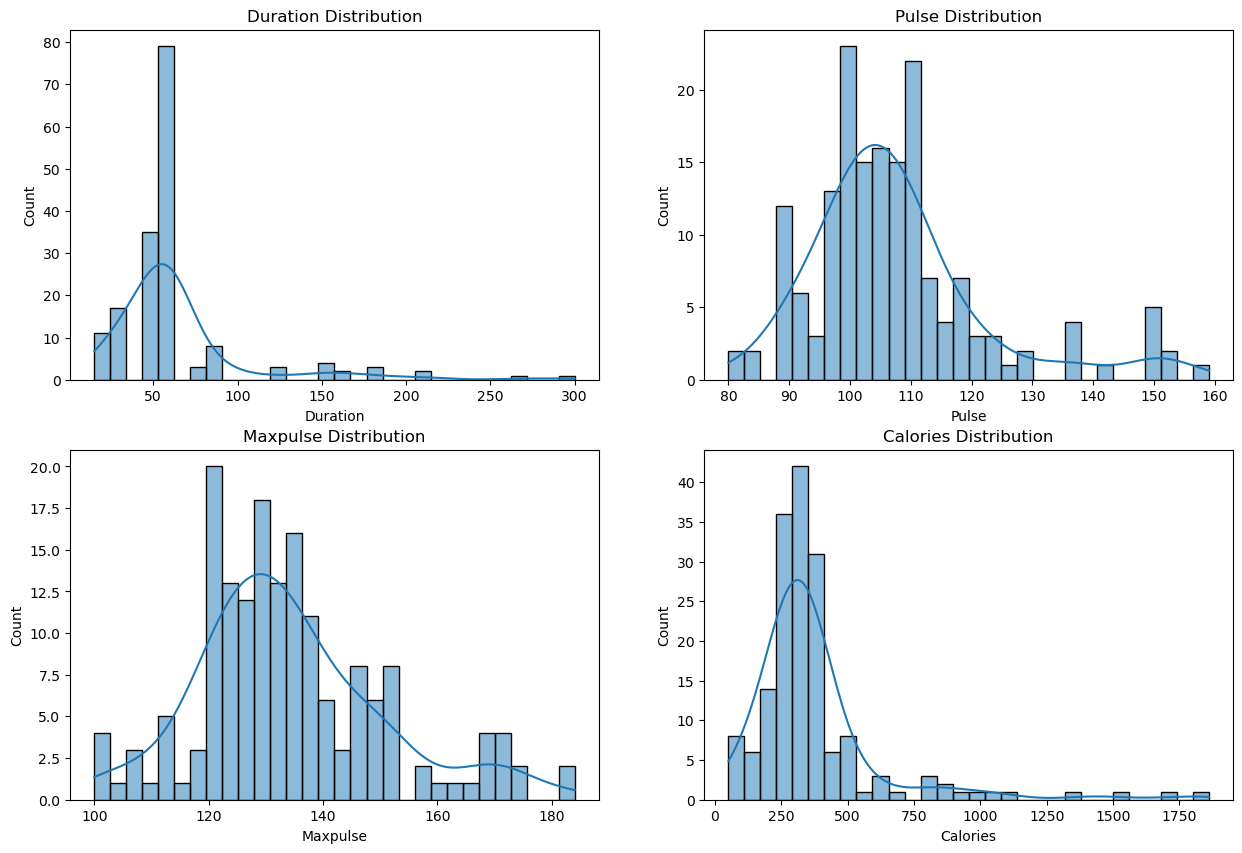

In [18]:
# Histogram of Duration
# Set up the figure size
plt.figure(figsize=(15, 10))
# Plot the histogram
plt.subplot(2, 2, 1)
plt.title('Duration Distribution')
sns.histplot(df['Duration'], bins=30, kde=True)
#Histogram of Pulse
plt.subplot(2, 2, 2)
plt.title('Pulse Distribution')
sns.histplot(df['Pulse'], bins=30, kde=True)
# Histogram of Maxpulse
plt.subplot(2, 2, 3)
plt.title('Maxpulse Distribution')
sns.histplot(df['Maxpulse'], bins=30, kde=True)
# Histogram of Calories
plt.subplot(2, 2, 4)
plt.title('Calories Distribution')
sns.histplot(df['Calories'], bins=30, kde=True)

<Axes: title={'center': 'Maxpulse vs Calories'}, xlabel='Maxpulse', ylabel='Calories'>

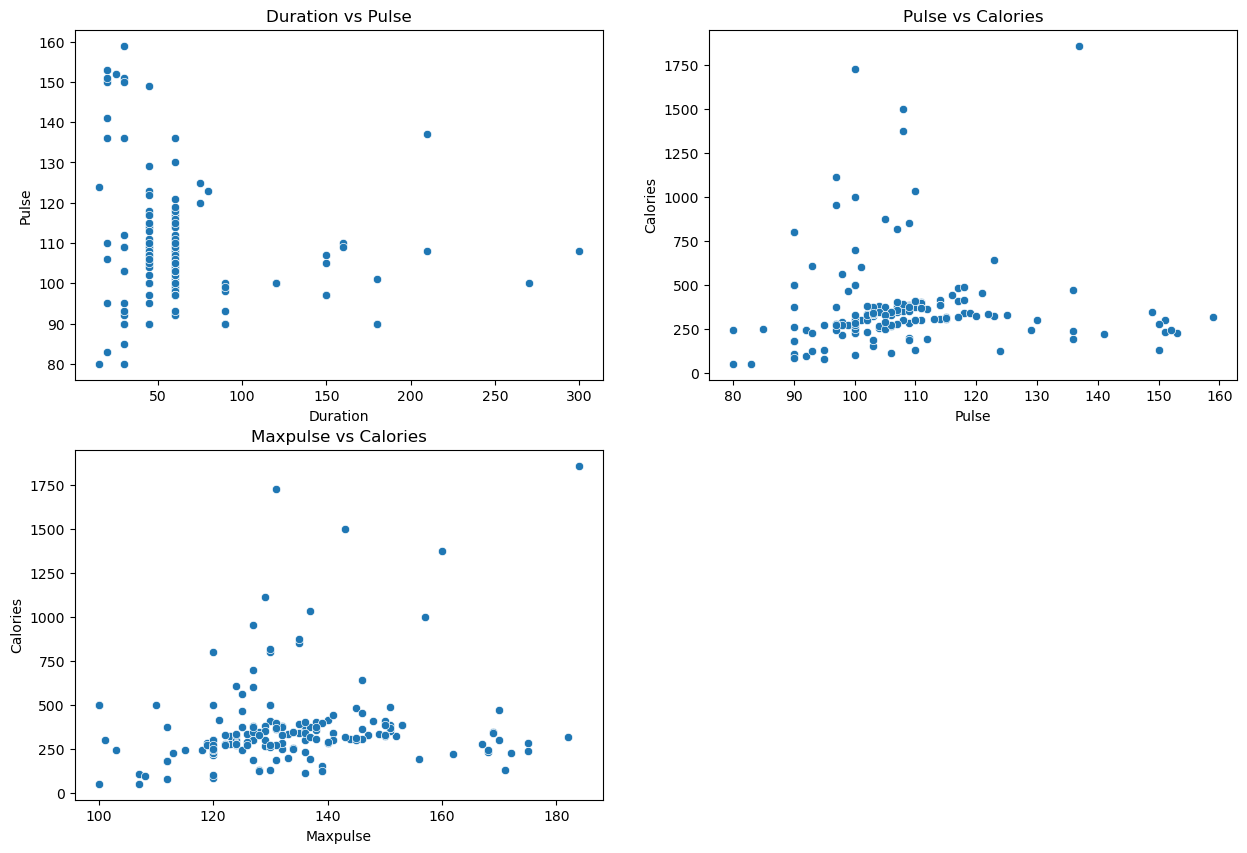

In [22]:
#Scatter plot of Duration vs Pulse
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Duration vs Pulse')
sns.scatterplot(x='Duration', y='Pulse', data=df)

#Scatter plot of Pulse vs Calories
plt.subplot(2, 2, 2)
plt.title('Pulse vs Calories')
sns.scatterplot(x='Pulse', y='Calories', data=df)

#Scatter plot of Maxpulse vs Calories
plt.subplot(2, 2, 3)
plt.title('Maxpulse vs Calories')
sns.scatterplot(x='Maxpulse', y='Calories', data=df)





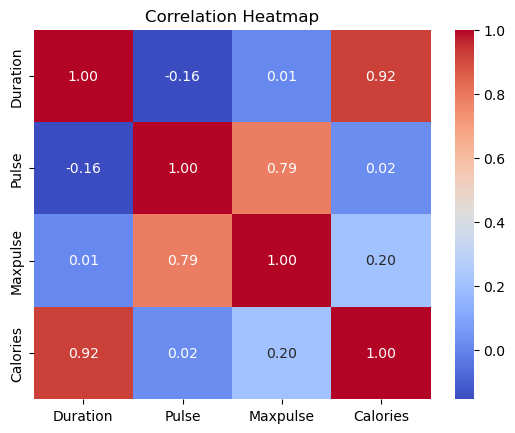

In [21]:
#Correlation heatmap
corr = df.corr()
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', )
plt.show()